In [3]:
# imports requireed packages
from tensorflow.keras.applications import InceptionV3, ResNet50 # vgg16
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

 

# load images from the folder
image_path = "test/" ##replace with the folder path that contains all images you want to put in the database


# loading all the images 
importedImages = []

#calculate number of images in the folder
number_files = [image_path + x for x in os.listdir(image_path) if ".jpg" in x]
print(len(number_files))

for f in number_files:
    filename = f
    load_resize_orginal_image = load_img(filename, target_size=(500, 500))
    numpy_image_array = img_to_array(load_resize_orginal_image)
    image_batch = np.expand_dims(numpy_image_array, axis=0)
    importedImages.append(image_batch)



50


In [4]:

images_import = np.vstack(importedImages)
processed_images = preprocess_input(images_import.copy())

   
#number of most similar images to retrieve
number_images_retrieve = 5

#loading of pretrained model
load_pretrained_model_weight = ResNet50(weights='imagenet')

#use this to extract features before the final layer
feature_extractor = Model(inputs=load_pretrained_model_weight.input,
                   outputs=load_pretrained_model_weight.get_layer("avg_pool").output)

 

In [5]:

import tensorflow as tf

# Assuming `processed_images` is your image array
processed_images = tf.image.resize(processed_images, [224, 224])

   
###extract features from processed_images
image_features = feature_extractor.predict(processed_images)

 
##save the array of the extracted features need to load into App
##only run when saving features extracted
np.save('images_feature.npy',image_features)

##load save image features 
#use when loading stored image features
image_features = np.load('images_feature.npy')

#compute the cosine similarity of the extracted features
Similarities = cosine_similarity(image_features)


# store the results into a pandas dataframe
cos_similarities = pd.DataFrame(Similarities, columns=number_files, index=number_files)
cos_similarities.to_csv('simi.csv',header ='true',encoding='utf-8')

# function to retrieve the most similar products for a given one
def retrieve_similar_images_based_on_features(input_image):
    model_width, model_height = 500,500
    original = load_img(input_image, target_size=(model_width,
                                                model_height))
    plt.imshow(original)
    plt.show()

 

    print("-"*100)
    print("images with similar features or colours:")
    closest_similar_image = cos_similarities[input_image].sort_values(ascending=False)[1:number_images_retrieve+10].index

 

    closest_similar_image_scores = cos_similarities[input_image].sort_values(ascending=False)[1:number_images_retrieve+10]



 

    for i in range(0,len(closest_similar_image)):
        original = load_img(closest_similar_image[i],
                            target_size=(model_width, model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_similar_image_scores[i])

 





2/2 [==============================] - 4s 976ms/step


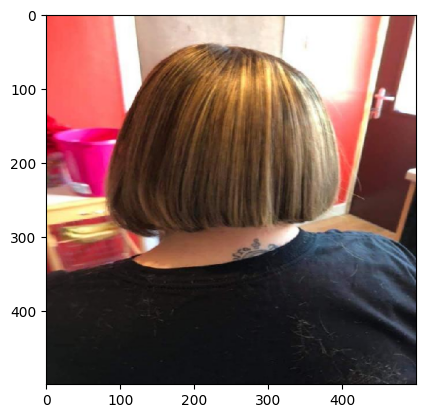

----------------------------------------------------------------------------------------------------
images with similar features or colours:


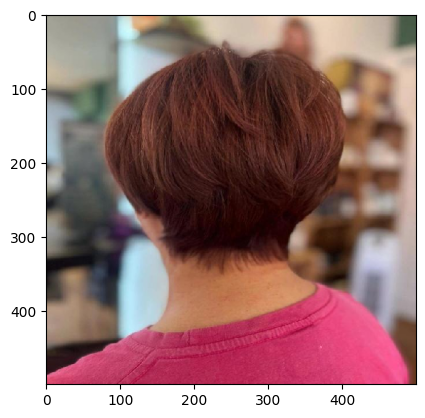

similarity score :  0.72249866


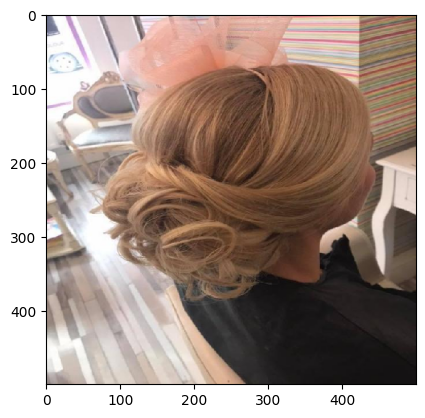

similarity score :  0.68770987


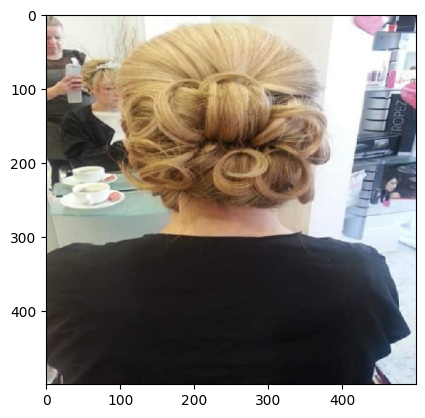

similarity score :  0.670555


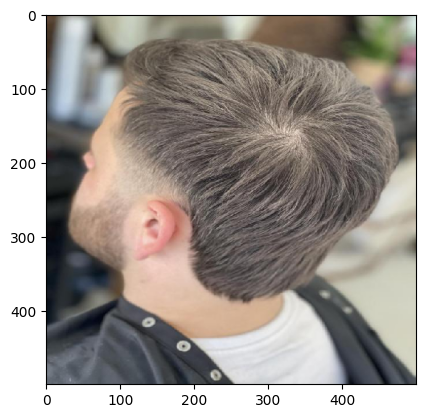

similarity score :  0.6579983


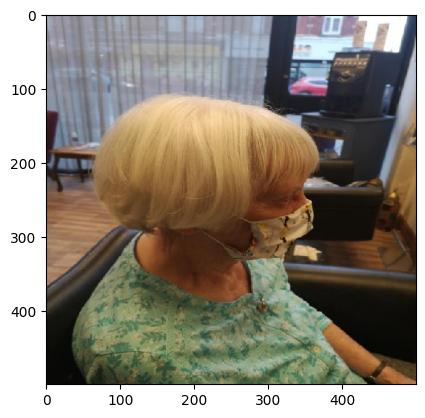

similarity score :  0.6548495


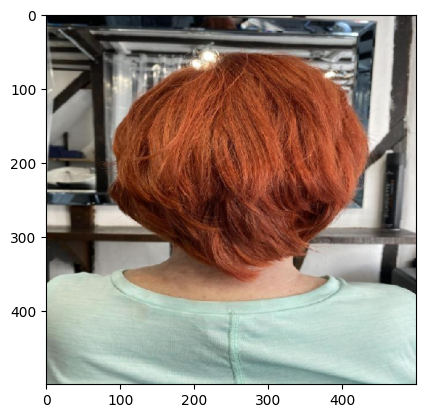

similarity score :  0.63583034


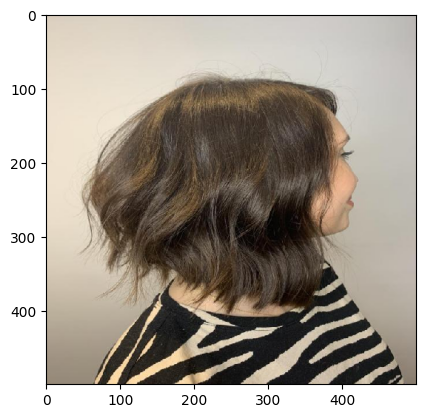

similarity score :  0.63138103


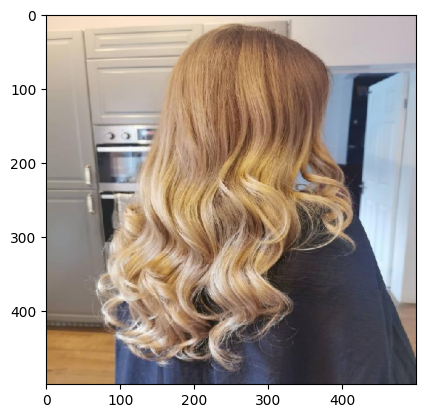

similarity score :  0.62451917


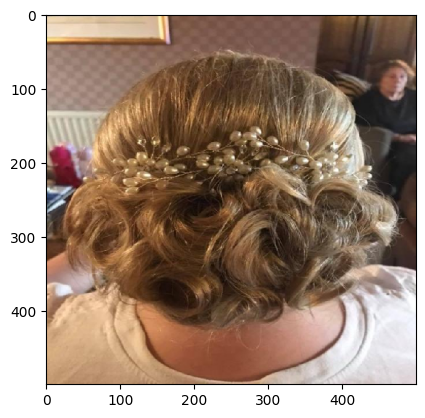

similarity score :  0.5971833


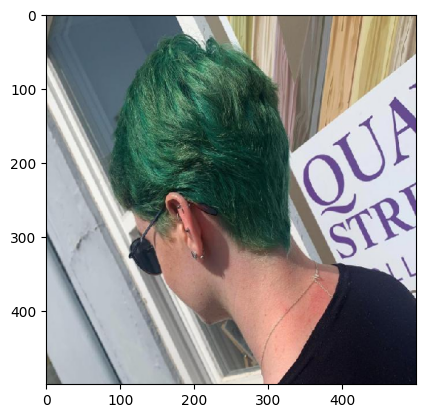

similarity score :  0.5936306


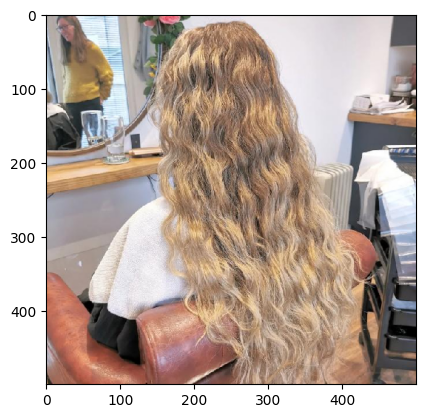

similarity score :  0.5915631


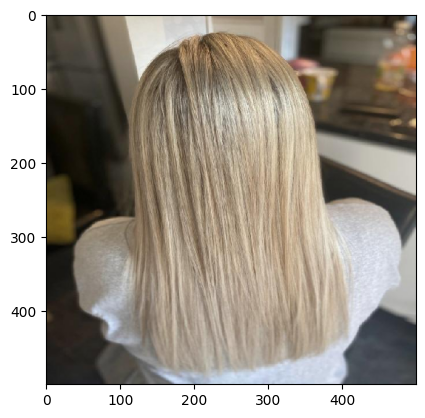

similarity score :  0.59015954


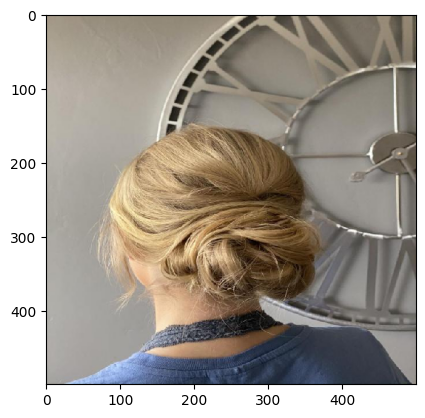

similarity score :  0.58590966


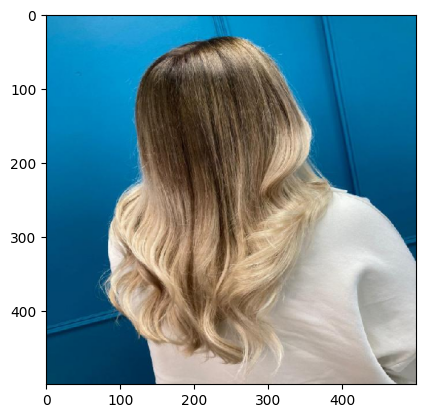

similarity score :  0.58540386


In [8]:
retrieve_similar_images_based_on_features(number_files[40])